In [100]:
from pandas import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np
!pip install sklearn
from sklearn.linear_model import LinearRegression
!pip install seaborn
import seaborn as sns

You should consider upgrading via the '/Users/daniellevangraan/Documents/sandbox/iu-python-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/daniellevangraan/Documents/sandbox/iu-python-project/venv/bin/python -m pip install --upgrade pip' command.


Plotted Training Data Set

Text(0.5, 0, 'Y4')

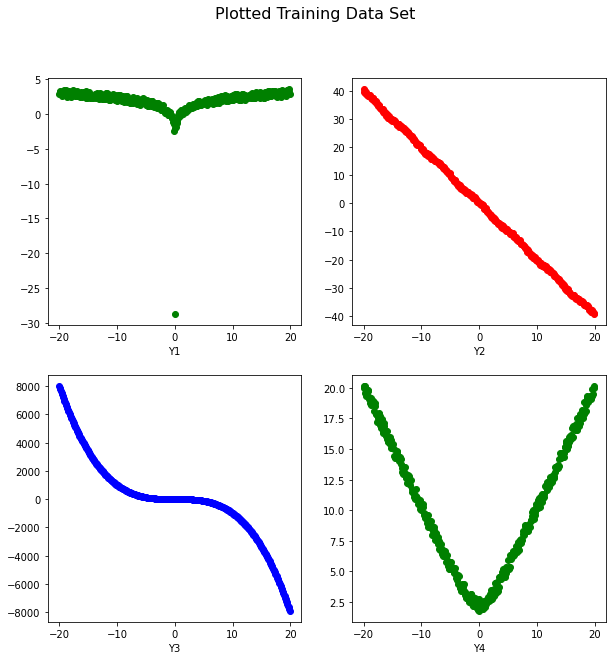

In [101]:
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')

x = pd.DataFrame(train_data.index)
y1 = pd.DataFrame(train_data['y1'])
y2 = pd.DataFrame(train_data['y2'])
y3 = pd.DataFrame(train_data['y3'])
y4 = pd.DataFrame(train_data['y4'])

fig, axs = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Plotted Training Data Set ', fontsize=16)

axs[0, 0].plot(x, y1,'go')
axs[0, 0].set_xlabel('Y1')

axs[0, 1].plot(x, y2, 'ro')
axs[0, 1].set_xlabel('Y2')

axs[1, 0].plot(x, y3, 'bo')
axs[1, 0].set_xlabel('Y3')

axs[1, 1].plot(x, y4, 'go')
axs[1, 1].set_xlabel('Y4')


Plotted Ideal Data Set

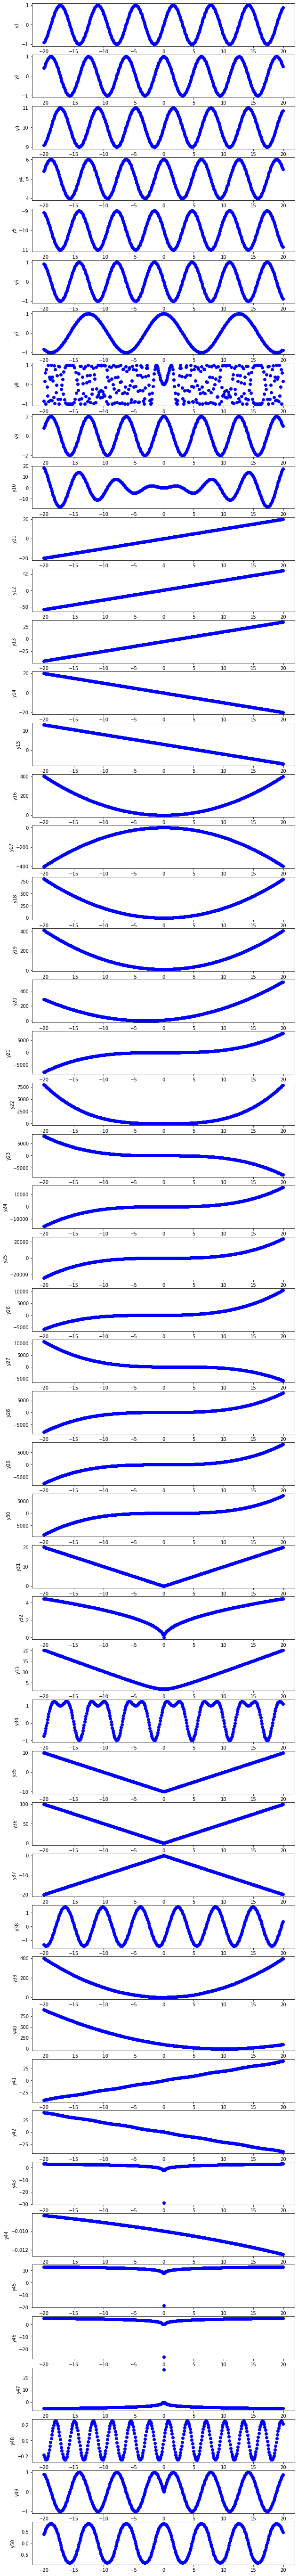

In [102]:
ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')

y = pd.DataFrame(ideal_data)
x = pd.DataFrame(ideal_data.index)

fig, axs = plt.subplots(50,1, figsize=(10,100))
for r in range(1,51):
    i = pd.DataFrame(ideal_data['y'+str(r)])
    axs[r-1].plot(i, 'bo')
    axs[r-1].set_ylabel('y'+str(r))
  

Describe Training Data Set

In [103]:
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')
train_data.describe()

,y1,y2,y3,y4
count,400.000000,400.000000,400.000000,400.000000
mean,1.936579,0.119462,19.993797,10.410399
std,1.822130,23.103234,3027.551365,5.463450
min,-28.682446,-39.444927,-7880.357400,1.782931
25%,1.580081,-20.136016,-977.389092,5.306520
50%,2.221229,0.334909,0.004036,10.353263
75%,2.654321,19.565271,1007.844850,15.169866
max,3.476077,40.653920,7999.659000,20.153624


In [104]:
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')
ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')
print(train_data.describe()['y1']['std'])
print(ideal_data.describe()['y43']['std'])
print(train_data.describe()['y1']['std']- ideal_data.describe()['y43']['std'])

1.8221298097055936
1.8147624782203813
0.007367331485212292


/var/folders/mj/6s4ny6qs6zz6rt717q_v_tch0000gn/T/ipykernel_1099/1227092248.py:51: UserWarning: Legend does not support 'y' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('y' + str(k), 'y' + str(best_function[0][0]))
/var/folders/mj/6s4ny6qs6zz6rt717q_v_tch0000gn/T/ipykernel_1099/1227092248.py:51: UserWarning: Legend does not support '1' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('y' + str(k), 'y' + str(best_function[0][0]))
/var/folders/mj/6s4ny6qs6zz6rt717q_v_tch0000gn/T/ipykernel_1099/1227092248.py:51: UserWarning: Legend does not support '2' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artis

Largest deviation between chosen function 43 and training function1 : 0.49920870000000006
Largest deviation between chosen function 42 and training function2 : 0.4965440000000001


/var/folders/mj/6s4ny6qs6zz6rt717q_v_tch0000gn/T/ipykernel_1099/1227092248.py:51: UserWarning: Legend does not support '3' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('y' + str(k), 'y' + str(best_function[0][0]))
/var/folders/mj/6s4ny6qs6zz6rt717q_v_tch0000gn/T/ipykernel_1099/1227092248.py:51: UserWarning: Legend does not support '4' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('y' + str(k), 'y' + str(best_function[0][0]))


Largest deviation between chosen function 23 and training function3 : 0.4981000000000222
Largest deviation between chosen function 33 and training function4 : 0.49722500000000025


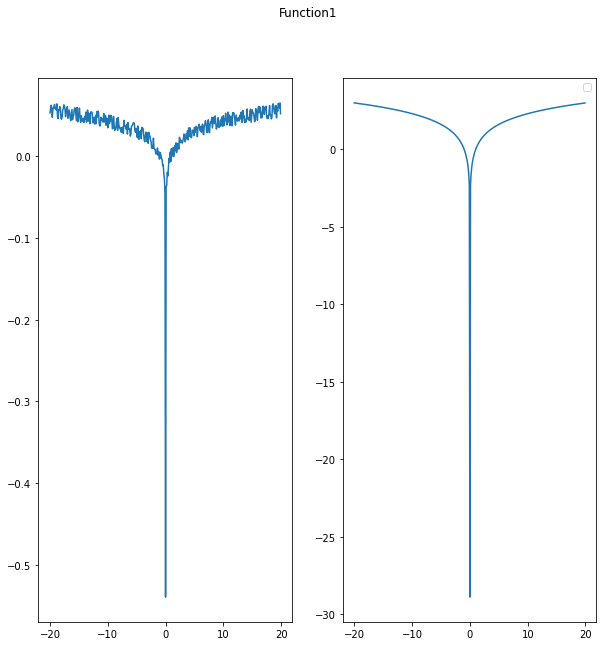

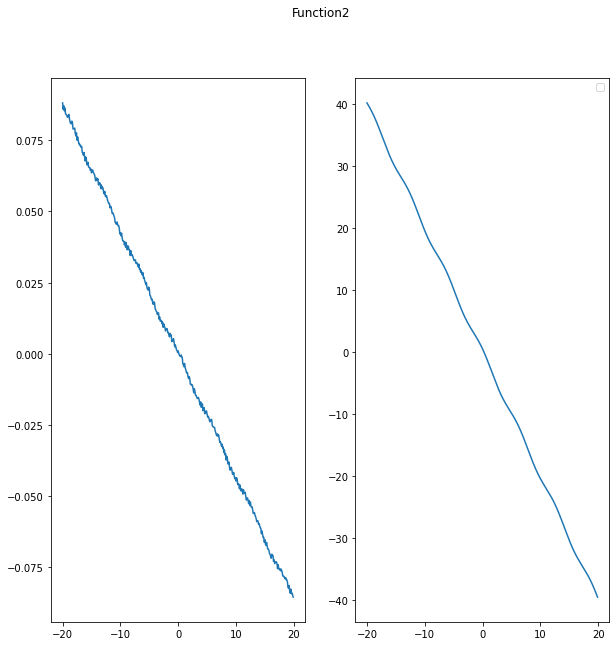

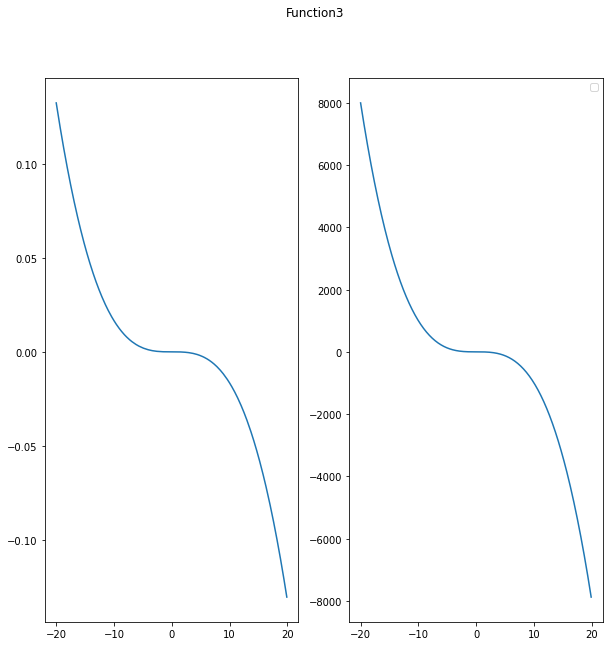

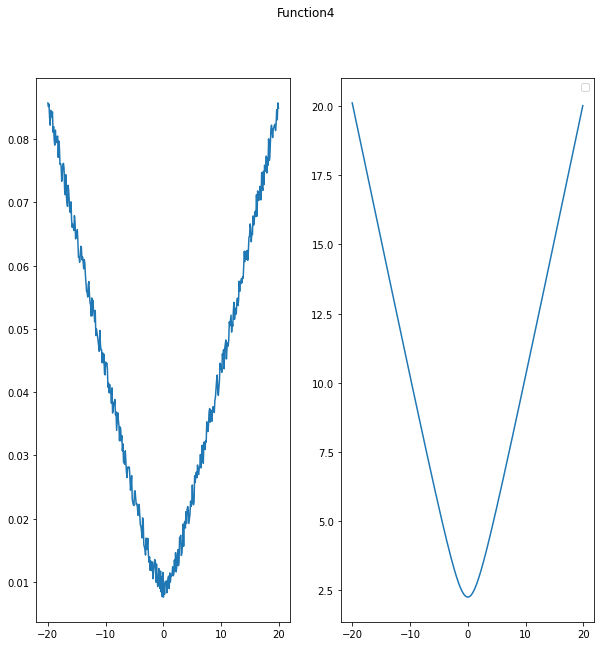

In [105]:
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal



# Read the csv files  
ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')
test_data = pd.read_csv('data/test.csv', index_col=0, delimiter=',')


# Create DataFrames from the CSV files 
ideal_df = pd.DataFrame(ideal_data)/ np.sqrt(np.sum(ideal_df**2))
test_df = pd.DataFrame(test_data)
train_df = pd.DataFrame(train_data)/ np.sqrt(np.sum(train_data**2))

# Loop through each given training function (4)
for k in range(1, 5):
    correlations = {}
    best_function = {}
    largest_deviation = {}
    y_deviation = {}
    
    # Loop through each of the 50 ideal functions
    for r in range(1, 51):
        y1 = pd.DataFrame(train_data['y' + str(k)])
        y2 = pd.DataFrame(ideal_data['y' + str(r)])

        s = signal.correlate(y1, y2, 'same')
        
        mean_y1 = np.mean(y1)[0]
        mean_y2 = np.mean(y2)[0]
        std_y1 = np.std(y1)[0]  # std = sqrt(mean(x)), 
        std_y2 = np.std(y2)[0]  # where x = abs(a - a.mean())**2.
        n = len(y1)   
        x = signal.correlate(y1 - mean_y2, y2 - mean_y1, mode='valid')[0][0] / n / (std_y1 * std_y2)
        correlations[str(r)] = x
        y_deviation[str(r)] = abs(std_y1 -std_y2)
        
    best_function = (sorted(correlations.items(), key=lambda kv: kv[1]))
    best_function = best_function[-1:]
    
    fig, ax = fig, axs = plt.subplots(1, 2, figsize=(10, 10))
    fig.suptitle('Function' + str(k))
    ax[0].plot(train_df['y' + str(k)])
    ax[1].plot(ideal_df['y' + str(best_function[0][0])])
    
    plt.legend('y' + str(k), 'y' + str(best_function[0][0]))
    y1 = pd.DataFrame(train_data['y' + str(k)])
    y2 = pd.DataFrame(ideal_data['y' + str(best_function[0][0])])
    
    deviation = np.array(y1) - np.array(y2)
    largest_deviation = (deviation.T.max())
    print('Largest deviation between chosen function '+ str(best_function[0][0])+ ' and training function' + str(k) + ' : '+ str(largest_deviation))


In [9]:
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Read the csv files  
ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')
test_data = pd.read_csv('data/test.csv', index_col=0, delimiter=',')

# Create DataFrames from the CSV files 
ideal_df = pd.DataFrame(ideal_data)
test_df = pd.DataFrame(test_data)
test_df = test_df.sort_index(ascending=False)

plt.rcParams["figure.figsize"] = (10,10)
ideal_df = ideal_df / np.sqrt(np.sum(ideal_df**2))
test_df = test_df / np.sqrt(np.sum(test_df**2))

plt.plot(ideal_df['y43'],'-o', color='r', mfc='k', zorder=3)
plt.plot(test_df,'-o', color='b', mfc='k',zorder=2)
plt.legend(["Function 1", "Test Data"])
plt.show()

plt.plot(ideal_df['y42'],'-o', color='r', mfc='k', zorder=3)
plt.plot(test_df,'-o', color='b', mfc='k',zorder=2)
plt.legend(["Function 2", "Test Data"])
plt.show()

plt.plot(ideal_df['y23'],'-o', color='r', mfc='k', zorder=3)
plt.plot(test_df,'-o', color='b', mfc='k',zorder=2)
plt.legend(["Function 3", "Test Data"])
plt.show()

plt.plot(ideal_df['y33'],'-o', color='r', mfc='k', zorder=3)
plt.plot(test_df,'-o', color='b', mfc='k',zorder=2)
plt.legend(["Function 4", "Test Data"])
plt.show()

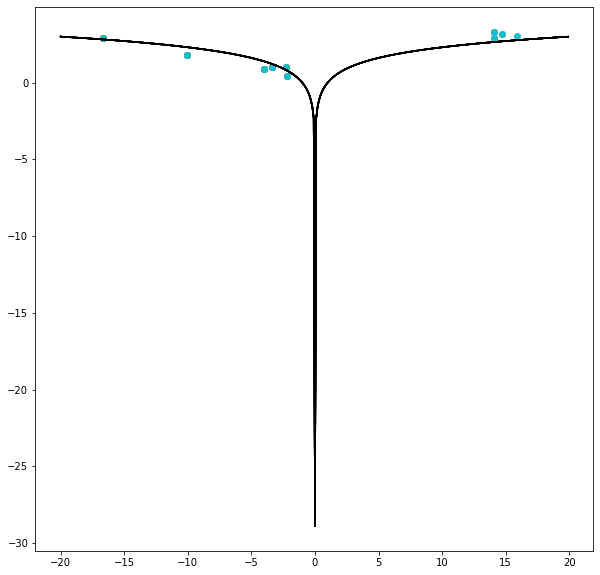

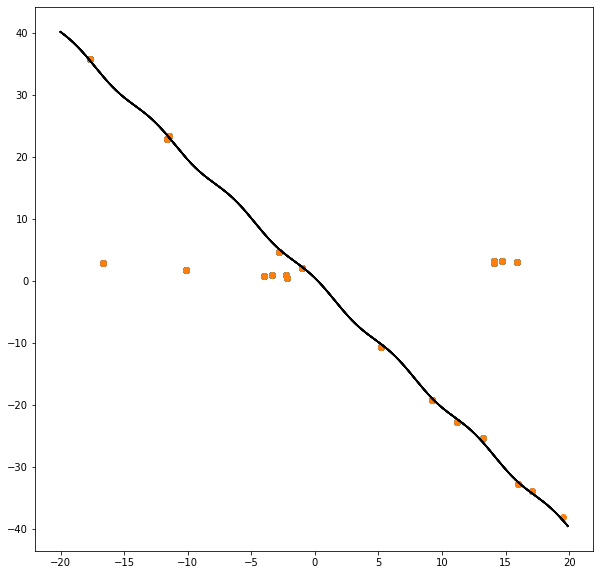

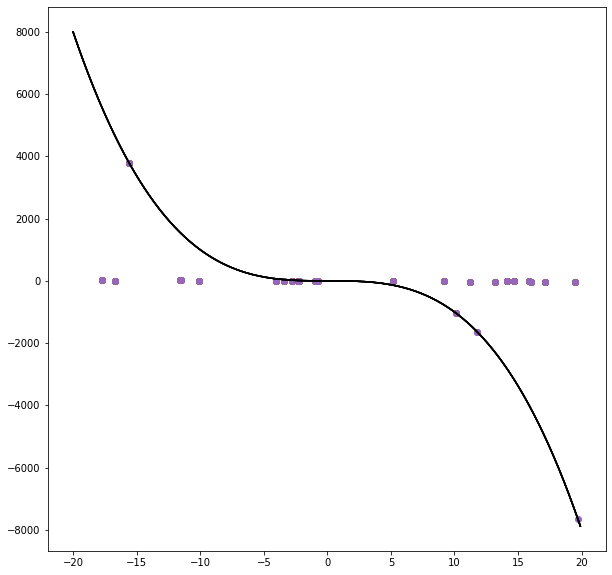

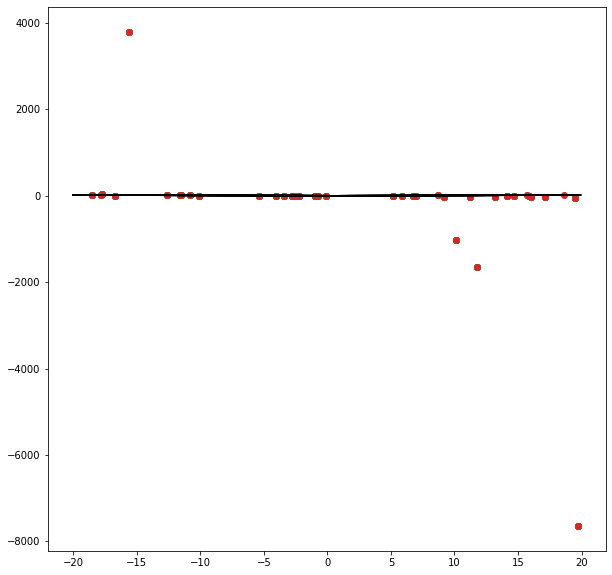

In [199]:
#ideal_df 
import math

ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')
test_data = pd.read_csv('data/test.csv', index_col=0, delimiter=',')

ideal_df = pd.DataFrame(ideal_data)
test_df = pd.DataFrame(test_data)

test_df = test_df.sort_index(ascending=True)
ideal_df = ideal_df.sort_index(ascending=True)

ideal_df = ideal_df
test_df = test_df 

matchy = []
matchx = []
deviations = []
idealf = []

data = {}
data['x'] = []
data['y'] = []
data['deltaY'] = []
data['noIdealFunc'] = []

for f in ['y43','y42','y23','y33']:
    for v in range(0, 99):
        deviation = abs(ideal_df[f][test_df.index[v]] - test_df.values[v])[0]
        if (deviation  < math.sqrt(0.5)):
            
            matchx.append(test_df['y'].index[v])
            matchy.append(test_df['y'].values[v])
            deviations.append(deviation)
            idealf.append(f)
            plt.plot(ideal_df[f], '-0')
            plt.scatter(matchx,matchy)
            
    data['x'] = matchx
    data['y'] = matchy
    data['deltaY'] = deviations
    data['noIdealFunc'] = idealf
    
    plt.show()
df = pd.DataFrame(data)        
df.to_csv('data/result.csv',index=False)